<a href="https://colab.research.google.com/github/Nikitaion/mental_disorders/blob/main/mental_disorders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Nikitaion/mental_disorders/main/data/290622_mental_disorders_data_without_somatika.csv -O ds.csv

--2022-07-11 12:39:15--  https://raw.githubusercontent.com/Nikitaion/mental_disorders/main/data/290622_mental_disorders_data_without_somatika.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13658 (13K) [text/plain]
Saving to: ‘ds.csv’

ds.csv              100%[===================>]  13.34K  --.-KB/s    in 0s      

2022-07-11 12:39:15 (87.8 MB/s) - ‘ds.csv’ saved [13658/13658]



In [2]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")

import pandas as pd
import numpy as np

from sklearn.model_selection import  train_test_split

from sklearn.preprocessing import StandardScaler


Tensorflow version: 2.8.2


In [3]:
ds = pd.read_csv("/content/ds.csv")
ds.head()

,Снинговый номер,Пол,Полных лет,"Образование(0-начальное, 4-высшее)","Род занятий(0-0, работает-1","Семейное положение(0-0, 1-женат)",Удовлетворенность семеными отношениями,Удовлетворенность материальным положением,Здоровье от 1 до 10,Были ли нарушения сна,...,Частота госпит,Стаж шизофр,P,N,G,PSQI,psqi больше 5,(ТРЕВОГА)Гаиильтон больше 16,(ДЕПРЕССИЯ)madrs больше 6,(ДЕПРЕССИЯ)Калгари больше 5
0,УП-1,М,32,4,0,0,5,0,7,1,...,0,3.7,11,11,18,6,1,0,0,0
1,УП-2,М,26,2,0,0,5,0,10,1,...,1,2.0,10,25,36,8,1,0,1,1
2,УП-3,М,49,2,0,0,5,1,10,0,...,2,23.0,9,16,23,3,0,0,0,0
3,УП-4,М,50,2,0,0,5,1,7,1,...,1,34.0,13,13,20,6,1,0,0,0
4,УП-6,М,39,2,0,0,5,1,7,0,...,0,4.0,9,13,22,4,0,0,0,0


In [4]:
ds.tail()

,Снинговый номер,Пол,Полных лет,"Образование(0-начальное, 4-высшее)","Род занятий(0-0, работает-1","Семейное положение(0-0, 1-женат)",Удовлетворенность семеными отношениями,Удовлетворенность материальным положением,Здоровье от 1 до 10,Были ли нарушения сна,...,Частота госпит,Стаж шизофр,P,N,G,PSQI,psqi больше 5,(ТРЕВОГА)Гаиильтон больше 16,(ДЕПРЕССИЯ)madrs больше 6,(ДЕПРЕССИЯ)Калгари больше 5
170,УФ-32,М,35,3,0,0,2,0,7,1,...,0,16.0,19,8,31,5,0,0,1,1
171,УФ-33,М,57,2,0,0,1,0,9,1,...,0,35.0,10,10,23,5,0,0,0,0
172,УФ-34,М,24,4,1,0,5,1,10,1,...,0,6.0,7,9,27,5,0,0,0,0
173,УФ-33-2,М,41,2,0,0,3,0,9,1,...,2,13.0,14,13,21,9,1,1,1,0
174,УФ-34-2,М,32,2,0,0,5,1,10,1,...,1,9.0,7,12,28,6,1,0,1,0


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Снинговый номер                            175 non-null    object 
 1   Пол                                        175 non-null    object 
 2   Полных лет                                 175 non-null    int64  
 3   Образование(0-начальное, 4-высшее)         175 non-null    int64  
 4   Род занятий(0-0, работает-1                175 non-null    int64  
 5   Семейное положение(0-0, 1-женат)           175 non-null    int64  
 6   Удовлетворенность семеными отношениями     175 non-null    int64  
 7   Удовлетворенность материальным положением  175 non-null    int64  
 8   Здоровье от 1 до 10                        175 non-null    int64  
 9   Были ли нарушения сна                      175 non-null    int64  
 10  ИМТ                       

In [6]:
ds.isna().sum()

Снинговый номер                              0
Пол                                          0
Полных лет                                   0
Образование(0-начальное, 4-высшее)           0
Род занятий(0-0, работает-1                  0
Семейное положение(0-0, 1-женат)             0
Удовлетворенность семеными отношениями       0
Удовлетворенность материальным положением    0
Здоровье от 1 до 10                          0
Были ли нарушения сна                        0
ИМТ                                          0
Операции                                     0
ЧМТ                                          0
Насл отягощенность                           0
Дебют                                        0
Частота госпит                               0
Стаж шизофр                                  0
P                                            0
N                                            0
G                                            0
PSQI                                         0
psqi больше 5

In [7]:
# drop unnecessary columns
ds = ds.drop(columns=['Снинговый номер'])
# ds = ds.drop(columns=['Здоровье от 1 до 10', 'Удовлетворенность материальным положением', 'Рост', 'Вес', 'BARS (акатизия)', 'SAS (Экстрапир)', 'AIMS (непр дв)', 'ESS', 'шкала общего клин впечатления', 'шкала соц функционир'])

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Пол                                        175 non-null    object 
 1   Полных лет                                 175 non-null    int64  
 2   Образование(0-начальное, 4-высшее)         175 non-null    int64  
 3   Род занятий(0-0, работает-1                175 non-null    int64  
 4   Семейное положение(0-0, 1-женат)           175 non-null    int64  
 5   Удовлетворенность семеными отношениями     175 non-null    int64  
 6   Удовлетворенность материальным положением  175 non-null    int64  
 7   Здоровье от 1 до 10                        175 non-null    int64  
 8   Были ли нарушения сна                      175 non-null    int64  
 9   ИМТ                                        175 non-null    float64
 10  Операции                  

In [9]:
ds['Пол'].value_counts()

М    132
Ж     43
Name: Пол, dtype: int64

In [10]:
ds['Пол'] = np.where(ds['Пол']=='М',1,0)

In [11]:
ds['Пол'].value_counts()

1    132
0     43
Name: Пол, dtype: int64

In [12]:
ds.head()

,Пол,Полных лет,"Образование(0-начальное, 4-высшее)","Род занятий(0-0, работает-1","Семейное положение(0-0, 1-женат)",Удовлетворенность семеными отношениями,Удовлетворенность материальным положением,Здоровье от 1 до 10,Были ли нарушения сна,ИМТ,...,Частота госпит,Стаж шизофр,P,N,G,PSQI,psqi больше 5,(ТРЕВОГА)Гаиильтон больше 16,(ДЕПРЕССИЯ)madrs больше 6,(ДЕПРЕССИЯ)Калгари больше 5
0,1,32,4,0,0,5,0,7,1,24.012346,...,0,3.7,11,11,18,6,1,0,0,0
1,1,26,2,0,0,5,0,10,1,20.244898,...,1,2.0,10,25,36,8,1,0,1,1
2,1,49,2,0,0,5,1,10,0,29.752744,...,2,23.0,9,16,23,3,0,0,0,0
3,1,50,2,0,0,5,1,7,1,22.093170,...,1,34.0,13,13,20,6,1,0,0,0
4,1,39,2,0,0,5,1,7,0,20.761246,...,0,4.0,9,13,22,4,0,0,0,0


In [13]:
# Check for na values
ds.isna().sum()

Пол                                          0
Полных лет                                   0
Образование(0-начальное, 4-высшее)           0
Род занятий(0-0, работает-1                  0
Семейное положение(0-0, 1-женат)             0
Удовлетворенность семеными отношениями       0
Удовлетворенность материальным положением    0
Здоровье от 1 до 10                          0
Были ли нарушения сна                        0
ИМТ                                          0
Операции                                     0
ЧМТ                                          0
Насл отягощенность                           0
Дебют                                        0
Частота госпит                               0
Стаж шизофр                                  0
P                                            0
N                                            0
G                                            0
PSQI                                         0
psqi больше 5                                0
(ТРЕВОГА)Гаии

In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Пол                                        175 non-null    int64  
 1   Полных лет                                 175 non-null    int64  
 2   Образование(0-начальное, 4-высшее)         175 non-null    int64  
 3   Род занятий(0-0, работает-1                175 non-null    int64  
 4   Семейное положение(0-0, 1-женат)           175 non-null    int64  
 5   Удовлетворенность семеными отношениями     175 non-null    int64  
 6   Удовлетворенность материальным положением  175 non-null    int64  
 7   Здоровье от 1 до 10                        175 non-null    int64  
 8   Были ли нарушения сна                      175 non-null    int64  
 9   ИМТ                                        175 non-null    float64
 10  Операции                  

In [15]:
# turn dataset to float32
ds = ds.astype(np.float32)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Пол                                        175 non-null    float32
 1   Полных лет                                 175 non-null    float32
 2   Образование(0-начальное, 4-высшее)         175 non-null    float32
 3   Род занятий(0-0, работает-1                175 non-null    float32
 4   Семейное положение(0-0, 1-женат)           175 non-null    float32
 5   Удовлетворенность семеными отношениями     175 non-null    float32
 6   Удовлетворенность материальным положением  175 non-null    float32
 7   Здоровье от 1 до 10                        175 non-null    float32
 8   Были ли нарушения сна                      175 non-null    float32
 9   ИМТ                                        175 non-null    float32
 10  Операции                  

In [16]:
ds['psqi больше 5'].value_counts()

1.0    103
0.0     72
Name: psqi больше 5, dtype: int64

In [17]:
ds['(ТРЕВОГА)Гаиильтон больше 16'].value_counts()


0.0    135
1.0     40
Name: (ТРЕВОГА)Гаиильтон больше 16, dtype: int64

In [18]:
ds['(ДЕПРЕССИЯ)madrs больше 6'].value_counts()

0.0    116
1.0     59
Name: (ДЕПРЕССИЯ)madrs больше 6, dtype: int64

In [19]:
ds['(ДЕПРЕССИЯ)Калгари больше 5'].value_counts()

0.0    136
1.0     39
Name: (ДЕПРЕССИЯ)Калгари больше 5, dtype: int64

In [20]:
# Let's try to use 'psqi больше 5' as y value
data = ds

In [21]:
# Create X, y
y = data['psqi больше 5']
X = data.drop(columns=['PSQI', 'psqi больше 5', '(ТРЕВОГА)Гаиильтон больше 16', '(ДЕПРЕССИЯ)madrs больше 6', '(ДЕПРЕССИЯ)Калгари больше 5'])
# X = data.drop(columns=['Нарушения сна больше 5'])

In [22]:
X.columns

Index(['Пол', 'Полных лет', 'Образование(0-начальное, 4-высшее)',
       'Род занятий(0-0, работает-1', 'Семейное положение(0-0, 1-женат)',
       'Удовлетворенность семеными отношениями',
       'Удовлетворенность материальным положением', 'Здоровье от 1 до 10',
       'Были ли нарушения сна', 'ИМТ', 'Операции', 'ЧМТ', 'Насл отягощенность',
       'Дебют', 'Частота госпит', 'Стаж шизофр', 'P', 'N', 'G'],
      dtype='object')

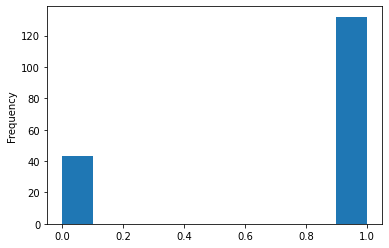

In [23]:
X['Пол'].plot.hist()

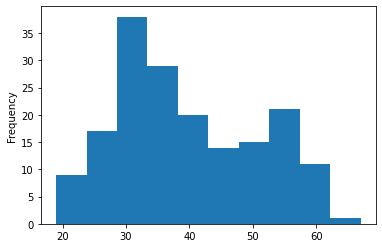

In [24]:
X['Полных лет'].plot.hist()

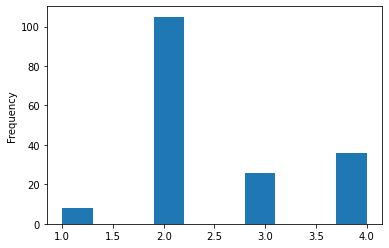

In [25]:
X['Образование(0-начальное, 4-высшее)'].plot.hist()

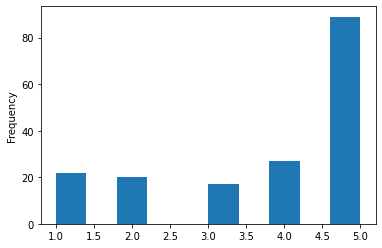

In [26]:
X['Удовлетворенность семеными отношениями'].plot.hist()

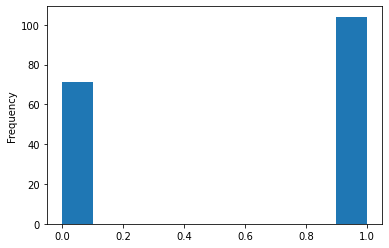

In [27]:
X['Удовлетворенность материальным положением'].plot.hist()

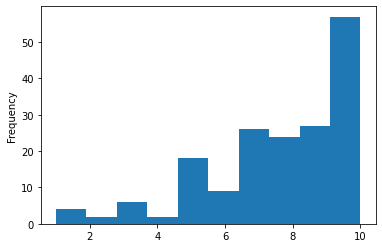

In [28]:
X['Здоровье от 1 до 10'].plot.hist()

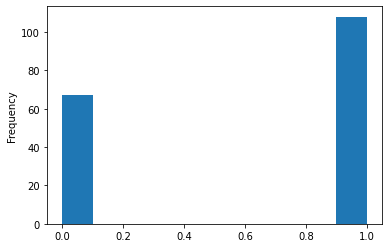

In [29]:
X['Были ли нарушения сна'].plot.hist()

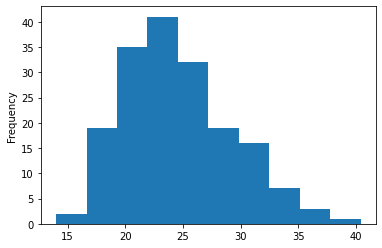

In [30]:
X['ИМТ'].plot.hist()

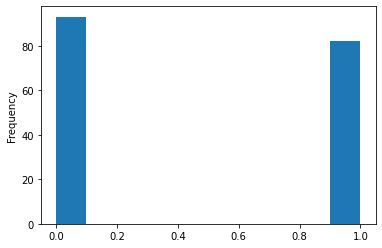

In [31]:
X['Операции'].plot.hist()

In [32]:
# X['Аллергии'].plot.hist()

In [33]:
# X['Забол кожи'].plot.hist()

In [34]:
# X['ГБ'].plot.hist()

In [35]:
# X['Панкреатит'].plot.hist()

In [36]:
# X['Дисфункция ЖКТ'].plot.hist()

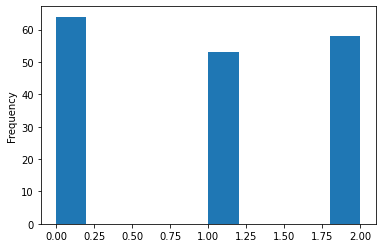

In [37]:
X['ЧМТ'].plot.hist()

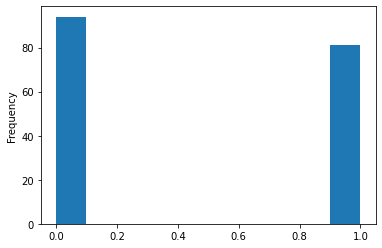

In [38]:
X['Насл отягощенность'].plot.hist()

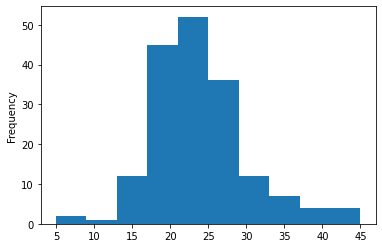

In [39]:
X['Дебют'].plot.hist()

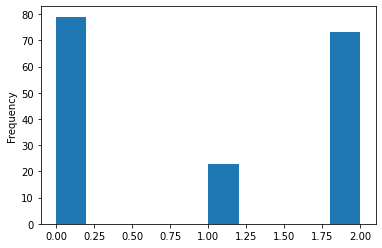

In [40]:
X['Частота госпит'].plot.hist()

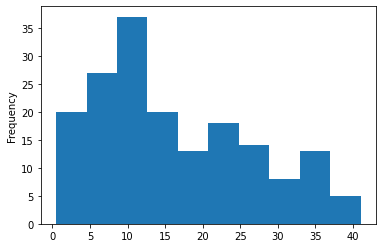

In [41]:
X['Стаж шизофр'].plot.hist()

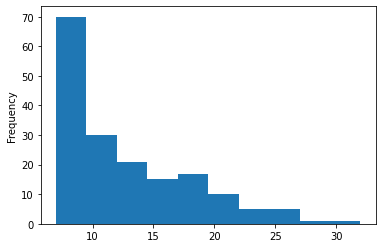

In [42]:
X['P'].plot.hist()

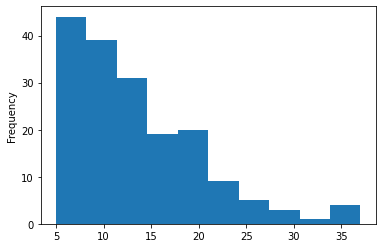

In [43]:
X['N'].plot.hist()

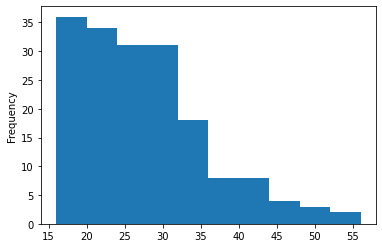

In [44]:
X['G'].plot.hist()

In [45]:
X.min()

Пол                                           0.000000
Полных лет                                   19.000000
Образование(0-начальное, 4-высшее)            1.000000
Род занятий(0-0, работает-1                   0.000000
Семейное положение(0-0, 1-женат)              0.000000
Удовлетворенность семеными отношениями        1.000000
Удовлетворенность материальным положением     0.000000
Здоровье от 1 до 10                           1.000000
Были ли нарушения сна                         0.000000
ИМТ                                          14.005112
Операции                                      0.000000
ЧМТ                                           0.000000
Насл отягощенность                            0.000000
Дебют                                         5.000000
Частота госпит                                0.000000
Стаж шизофр                                   0.500000
P                                             7.000000
N                                             5.000000
G         

In [118]:
X.max()

Пол                                           1.000000
Полных лет                                   67.000000
Образование(0-начальное, 4-высшее)            4.000000
Род занятий(0-0, работает-1                   1.000000
Семейное положение(0-0, 1-женат)              1.000000
Удовлетворенность семеными отношениями        5.000000
Удовлетворенность материальным положением     1.000000
Здоровье от 1 до 10                          10.000000
Были ли нарушения сна                         1.000000
ИМТ                                          40.404041
Операции                                      1.000000
ЧМТ                                           2.000000
Насл отягощенность                            1.000000
Дебют                                        45.000000
Частота госпит                                2.000000
Стаж шизофр                                  41.000000
P                                            32.000000
N                                            37.000000
G         

### recursive feature elimination (feature selection)

In [122]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
lr = LinearRegression()
#select 5 the most informative features
rfe = RFE(lr, n_features_to_select=5) 
selector = rfe.fit(X,y)
selector.support_

array([ True,  True, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False])

In [123]:
selector.ranking_


array([ 1,  1, 13,  2,  3, 12,  4,  8,  1, 10,  5, 14, 11,  1, 15,  1,  9,
        7,  6])

In [124]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

X_scaled = minmax_scaler.fit_transform(X)

In [125]:
lr = LinearRegression()
#select 5 the most informative features
rfe = RFE(lr, n_features_to_select=5) 
selector = rfe.fit(X_scaled,y)
selector.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True])

In [126]:
selector.ranking_


array([ 4,  1, 12,  7,  6, 11,  9,  8,  3,  5, 10, 14, 13,  1, 15,  1,  2,
        1,  1])

[False,  Полных лет, False, False, False, False, False, False, False,
       False, False, False, False,  Дебют, False,  Стаж шизофр, False,  N,
        G])

Полных лет, G, N, Стаж шизофр, Дебют

In [127]:
lr = LinearRegression()
#select 5 the most informative features
rfe = RFE(lr, n_features_to_select=3) 
selector = rfe.fit(X_scaled,y)
selector.support_

# Полных лет, G, N, Стаж шизофр, Дебют

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False])

In [128]:
selector.ranking_


array([ 6,  1, 14,  9,  8, 13, 11, 10,  5,  7, 12, 16, 15,  1, 17,  1,  4,
        3,  2])

LASSO regression (feature selection)

In [47]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])


In [50]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [51]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.260 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.218 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.248 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.212 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.260 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.260 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.218 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.249 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.213 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.260 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.260 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [52]:
search.best_params_


{'model__alpha': 0.1}

In [53]:
coefficients = search.best_estimator_.named_steps['model'].coef_


In [54]:
coefficients

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.00213946,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ], dtype=float32)

In [55]:
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00213946, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)

In [56]:
np.array(['Пол', 'Полных лет', 'Образование(0-начальное, 4-высшее)',
       'Род занятий(0-0, работает-1', 'Семейное положение(0-0, 1-женат)',
       'Удовлетворенность семеными отношениями', 'Здоровье от 1 до 10', 'Были ли нарушения сна', 'ИМТ', 'Операции',
       'Удовлетворенность материальным положением','ЧМТ',
       'Насл отягощенность', 'Дебют', 'Частота госпит', 'Стаж шизофр', 'P',
       'N', 'G'])[importance > 0]


array(['ИМТ'], dtype='<U41')

In [57]:
np.array(['Пол', 'Полных лет', 'Образование(0-начальное, 4-высшее)',
       'Род занятий(0-0, работает-1', 'Семейное положение(0-0, 1-женат)',
       'Удовлетворенность семеными отношениями', 'Здоровье от 1 до 10', 'Были ли нарушения сна', 'ИМТ', 'Операции',
       'Удовлетворенность материальным положением','ЧМТ',
       'Насл отягощенность', 'Дебют', 'Частота госпит', 'Стаж шизофр', 'P',
       'N', 'G'])[importance == 0]


array(['Пол', 'Полных лет', 'Образование(0-начальное, 4-высшее)',
       'Род занятий(0-0, работает-1', 'Семейное положение(0-0, 1-женат)',
       'Удовлетворенность семеными отношениями', 'Здоровье от 1 до 10',
       'Были ли нарушения сна', 'Операции',
       'Удовлетворенность материальным положением', 'ЧМТ',
       'Насл отягощенность', 'Дебют', 'Частота госпит', 'Стаж шизофр',
       'P', 'N', 'G'], dtype='<U41')

In [58]:
from sklearn.datasets import load_diabetes

load_diabetes()['feature_names']


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [59]:
# Find 3 best predictors witn chi square and ANOVA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # chi^2
from sklearn.feature_selection import f_classif # ANOVA

X_chi2 = SelectKBest(chi2, k=5).fit_transform(X, y)
X_anova = SelectKBest(f_classif, k=5).fit_transform(X, y)

Get the Top Selected Features

https://ml2021.medium.com/chi-square-and-anova-feature-selection-for-ml-5e1063ab0991

In [60]:
f_score = chi2(X, y)
f_score
# The first array is the F_score , 2nd one is the P_values
# the smaller the P value the more significant the difference in the features

(array([8.81632874e-01, 3.74369494e-01, 7.66156713e-06, 2.06719560e-01,
        1.45127179e-01, 6.05965998e-03, 7.04258205e-01, 2.79589522e+00,
        4.99920218e+00, 1.04374187e-02, 1.13012241e+00, 7.47643030e-01,
        2.75761783e-01, 5.57276766e-01, 1.48905613e-01, 2.30464656e-05,
        1.69809484e+01, 8.69360186e-01, 1.93603187e+01]),
 array([3.47754838e-01, 5.40632100e-01, 9.97791495e-01, 6.49350820e-01,
        7.03236185e-01, 9.37952291e-01, 4.01356564e-01, 9.45059716e-02,
        2.53590056e-02, 9.18626751e-01, 2.87749230e-01, 3.87223489e-01,
        5.99492646e-01, 4.55359561e-01, 6.99583395e-01, 9.96169631e-01,
        3.77567873e-05, 3.51132497e-01, 1.08232811e-05]))

In [61]:
pvalues = pd.Series(f_score[1])
pvalues.index = X.columns
pvalues.sort_values(ascending=True)

G                                            0.000011
P                                            0.000038
Были ли нарушения сна                        0.025359
Здоровье от 1 до 10                          0.094506
Операции                                     0.287749
Пол                                          0.347755
N                                            0.351132
ЧМТ                                          0.387223
Удовлетворенность материальным положением    0.401357
Дебют                                        0.455360
Полных лет                                   0.540632
Насл отягощенность                           0.599493
Род занятий(0-0, работает-1                  0.649351
Частота госпит                               0.699583
Семейное положение(0-0, 1-женат)             0.703236
ИМТ                                          0.918627
Удовлетворенность семеными отношениями       0.937952
Стаж шизофр                                  0.996170
Образование(0-начальное, 4-в

In [62]:
# Now use the SelectKBest Model with the chi2 classifier to find the best features

sel_ = SelectKBest(chi2, k=5).fit(X, y)
X.columns[sel_.get_support()]

Index(['Здоровье от 1 до 10', 'Были ли нарушения сна', 'Операции', 'P', 'G'], dtype='object')

In [63]:
ds.head(20)

,Пол,Полных лет,"Образование(0-начальное, 4-высшее)","Род занятий(0-0, работает-1","Семейное положение(0-0, 1-женат)",Удовлетворенность семеными отношениями,Удовлетворенность материальным положением,Здоровье от 1 до 10,Были ли нарушения сна,ИМТ,...,Частота госпит,Стаж шизофр,P,N,G,PSQI,psqi больше 5,(ТРЕВОГА)Гаиильтон больше 16,(ДЕПРЕССИЯ)madrs больше 6,(ДЕПРЕССИЯ)Калгари больше 5
0,1.0,32.0,4.0,0.0,0.0,5.0,0.0,7.0,1.0,24.012346,...,0.0,3.70,11.0,11.0,18.0,6.0,1.0,0.0,0.0,0.0
1,1.0,26.0,2.0,0.0,0.0,5.0,0.0,10.0,1.0,20.244898,...,1.0,2.00,10.0,25.0,36.0,8.0,1.0,0.0,1.0,1.0
2,1.0,49.0,2.0,0.0,0.0,5.0,1.0,10.0,0.0,29.752745,...,2.0,23.00,9.0,16.0,23.0,3.0,0.0,0.0,0.0,0.0
3,1.0,50.0,2.0,0.0,0.0,5.0,1.0,7.0,1.0,22.093170,...,1.0,34.00,13.0,13.0,20.0,6.0,1.0,0.0,0.0,0.0
4,1.0,39.0,2.0,0.0,0.0,5.0,1.0,7.0,0.0,20.761246,...,0.0,4.00,9.0,13.0,22.0,4.0,0.0,0.0,0.0,0.0
5,1.0,26.0,2.0,1.0,1.0,5.0,1.0,10.0,1.0,25.737082,...,2.0,1.00,7.0,9.0,21.0,1.0,0.0,0.0,0.0,0.0
6,1.0,35.0,3.0,0.0,0.0,5.0,1.0,5.0,0.0,23.547880,...,2.0,12.20,14.0,20.0,40.0,8.0,1.0,1.0,1.0,0.0
7,1.0,31.0,3.0,0.0,0.0,1.0,0.0,3.0,1.0,26.128611,...,1.0,9.00,7.0,7.0,16.0,6.0,1.0,0.0,0.0,0.0
8,1.0,23.0,2.0,0.0,0.0,4.0,1.0,7.0,0.0,18.812147,...,0.0,5.67,15.0,11.0,28.0,8.0,1.0,0.0,0.0,0.0
9,1.0,37.0,3.0,1.0,0.0,5.0,0.0,7.0,0.0,20.761246,...,2.0,11.00,18.0,7.0,22.0,7.0,1.0,0.0,0.0,0.0


In [64]:
X_chi2 # TOP 3 - ИМТ, P, G. TOP 5 - Были ли нарушения сна, забол кожи и топ3

array([[ 7.,  1.,  0., 11., 18.],
       [10.,  1.,  0., 10., 36.],
       [10.,  0.,  0.,  9., 23.],
       [ 7.,  1.,  1., 13., 20.],
       [ 7.,  0.,  1.,  9., 22.],
       [10.,  1.,  0.,  7., 21.],
       [ 5.,  0.,  1., 14., 40.],
       [ 3.,  1.,  0.,  7., 16.],
       [ 7.,  0.,  1., 15., 28.],
       [ 7.,  0.,  0., 18., 22.],
       [ 1.,  1.,  1., 19., 41.],
       [10.,  1.,  0., 15., 26.],
       [ 7.,  1.,  1., 11., 48.],
       [10.,  1.,  1.,  9., 25.],
       [ 5.,  1.,  1., 12., 23.],
       [ 5.,  0.,  0., 14., 31.],
       [ 9.,  0.,  0.,  8., 22.],
       [10.,  0.,  1.,  8., 24.],
       [10.,  0.,  1.,  7., 18.],
       [10.,  1.,  1., 13., 28.],
       [ 9.,  1.,  0.,  8., 20.],
       [10.,  0.,  0.,  7., 16.],
       [ 4.,  1.,  1.,  8., 22.],
       [10.,  0.,  0.,  8., 25.],
       [ 5.,  1.,  0., 22., 37.],
       [ 7.,  1.,  0., 11., 35.],
       [ 7.,  0.,  0., 15., 31.],
       [ 7.,  1.,  1., 13., 23.],
       [ 9.,  1.,  1., 13., 30.],
       [ 9.,  

ANOVA

In [65]:
univariate = f_classif(X, y)
univariate

(array([3.6212697e+00, 1.1628228e-01, 0.0000000e+00, 2.4870960e-01,
        1.6109158e-01, 1.0520712e-02, 1.7331967e+00, 4.1912050e+00,
        1.3949199e+01, 1.1808826e-02, 2.1281385e+00, 1.0316648e+00,
        5.0901812e-01, 3.2690009e-01, 1.6404298e-01, 3.6380683e-05,
        7.6243281e+00, 2.7182183e-01, 7.7019234e+00], dtype=float32),
 array([5.8706161e-02, 7.3351598e-01, 1.0000000e+00, 6.1861867e-01,
        6.8864882e-01, 9.1842264e-01, 1.8974462e-01, 4.2146448e-02,
        2.5474589e-04, 9.1359144e-01, 1.4642949e-01, 3.1118634e-01,
        4.7652555e-01, 5.6823230e-01, 6.8596160e-01, 9.9519444e-01,
        6.3802483e-03, 6.0277903e-01, 6.1230245e-03], dtype=float32))

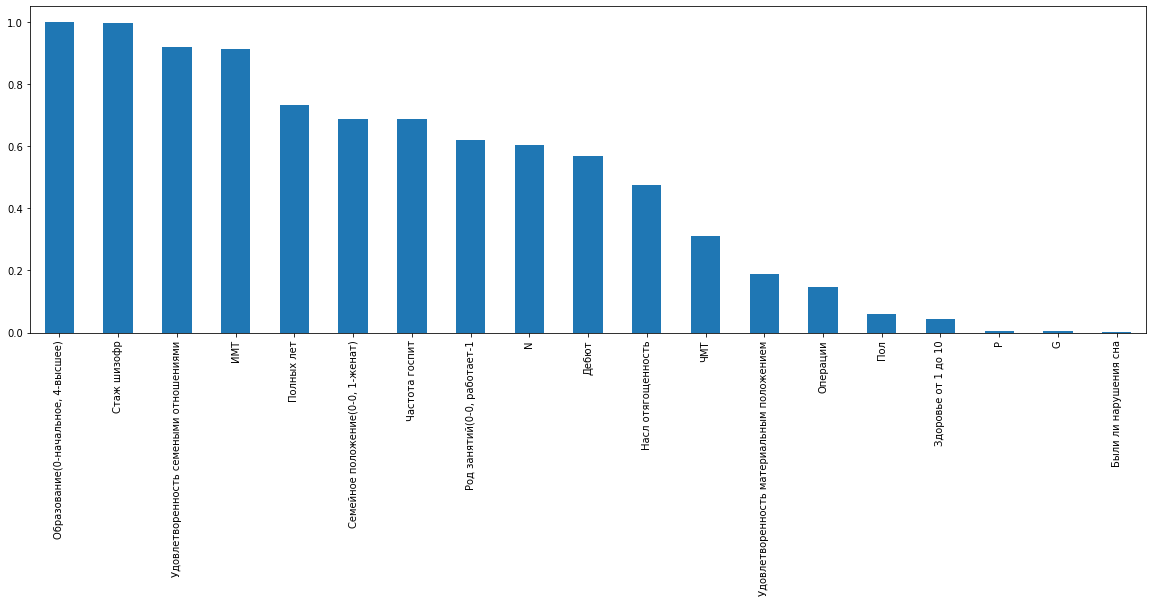

In [66]:
# The 2nd values are the PValue and we capture those below
univariate = pd.Series(univariate[1])
univariate.index = X.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))

In [67]:
# Get TOP 5 features
sel_ = SelectKBest(f_classif, k=5).fit(X, y)
X.columns[sel_.get_support()]

Index(['Пол', 'Здоровье от 1 до 10', 'Были ли нарушения сна', 'P', 'G'], dtype='object')

In [68]:
X_anova # TOP 3 - Были ли нарушения сна, P, G

array([[ 1.,  7.,  1., 11., 18.],
       [ 1., 10.,  1., 10., 36.],
       [ 1., 10.,  0.,  9., 23.],
       [ 1.,  7.,  1., 13., 20.],
       [ 1.,  7.,  0.,  9., 22.],
       [ 1., 10.,  1.,  7., 21.],
       [ 1.,  5.,  0., 14., 40.],
       [ 1.,  3.,  1.,  7., 16.],
       [ 1.,  7.,  0., 15., 28.],
       [ 1.,  7.,  0., 18., 22.],
       [ 1.,  1.,  1., 19., 41.],
       [ 1., 10.,  1., 15., 26.],
       [ 1.,  7.,  1., 11., 48.],
       [ 1., 10.,  1.,  9., 25.],
       [ 1.,  5.,  1., 12., 23.],
       [ 1.,  5.,  0., 14., 31.],
       [ 1.,  9.,  0.,  8., 22.],
       [ 1., 10.,  0.,  8., 24.],
       [ 1., 10.,  0.,  7., 18.],
       [ 1., 10.,  1., 13., 28.],
       [ 1.,  9.,  1.,  8., 20.],
       [ 1., 10.,  0.,  7., 16.],
       [ 1.,  4.,  1.,  8., 22.],
       [ 1., 10.,  0.,  8., 25.],
       [ 1.,  5.,  1., 22., 37.],
       [ 1.,  7.,  1., 11., 35.],
       [ 1.,  7.,  0., 15., 31.],
       [ 1.,  7.,  1., 13., 23.],
       [ 1.,  9.,  1., 13., 30.],
       [ 1.,  

In [69]:
# Find 4 best predictors witn scalied data

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

X_scaled = minmax_scaler.fit_transform(X)
X_chi2_scaled = SelectKBest(chi2, k=4).fit_transform(X_scaled, y)
X_anova_scaled = SelectKBest(f_classif, k=4).fit_transform(X_scaled, y)

In [70]:
f_score_scaled = chi2(X_scaled, y)
f_score_scaled
# The first array is the F_score , 2nd one is the P_values
# the smaller the P value the more significant the difference in the features

(array([8.81632874e-01, 1.50330947e-02, 4.24027991e-06, 2.06719560e-01,
        1.45127179e-01, 2.05485415e-03, 7.04258205e-01, 3.56339576e-01,
        4.99920218e+00, 9.13889215e-04, 1.13012241e+00, 3.73821515e-01,
        2.75761783e-01, 1.77243336e-02, 7.44528063e-02, 5.87319075e-07,
        1.56535759e+00, 4.29520792e-02, 1.19095746e+00]),
 array([0.34775484, 0.90241631, 0.998357  , 0.64935082, 0.70323619,
        0.96384388, 0.40135656, 0.5505462 , 0.02535901, 0.97588314,
        0.28774923, 0.54092855, 0.59949265, 0.89408838, 0.78496052,
        0.99938853, 0.21088249, 0.83581553, 0.27513651]))

In [71]:
pvalues = pd.Series(f_score_scaled[1])
pvalues.index = X.columns
pvalues.sort_values(ascending=True)

Были ли нарушения сна                        0.025359
P                                            0.210882
G                                            0.275137
Операции                                     0.287749
Пол                                          0.347755
Удовлетворенность материальным положением    0.401357
ЧМТ                                          0.540929
Здоровье от 1 до 10                          0.550546
Насл отягощенность                           0.599493
Род занятий(0-0, работает-1                  0.649351
Семейное положение(0-0, 1-женат)             0.703236
Частота госпит                               0.784961
N                                            0.835816
Дебют                                        0.894088
Полных лет                                   0.902416
Удовлетворенность семеными отношениями       0.963844
ИМТ                                          0.975883
Образование(0-начальное, 4-высшее)           0.998357
Стаж шизофр                 

In [72]:
# Now use the SelectKBest Model with the chi2 classifier to find the best features

sel_ = SelectKBest(chi2, k=5).fit(X_scaled, y)
X.columns[sel_.get_support()]

Index(['Пол', 'Были ли нарушения сна', 'Операции', 'P', 'G'], dtype='object')

ANOVA

In [73]:
univariate_scaled = f_classif(X_scaled, y)
univariate_scaled

(array([ 3.62126970e+00,  1.16262905e-01,  0.00000000e+00,  2.48709604e-01,
         1.61091581e-01,  1.05766766e-02,  1.73319674e+00,  4.19083738e+00,
         1.39491987e+01,  1.14049437e-02,  2.12813854e+00,  1.03166485e+00,
         5.09018123e-01,  3.27133834e-01,  1.64042979e-01, -2.91374363e-05,
         7.62430048e+00,  2.71821856e-01,  7.70179749e+00], dtype=float32),
 array([5.8706161e-02, 7.3353732e-01, 1.0000000e+00, 6.1861867e-01,
        6.8864882e-01, 9.1820669e-01, 1.8974462e-01, 4.2155363e-02,
        2.5474589e-04, 9.1507620e-01, 1.4642949e-01, 3.1118634e-01,
        4.7652555e-01, 5.6809413e-01, 6.8596160e-01,           nan,
        6.3803419e-03, 6.0277903e-01, 6.1234334e-03], dtype=float32))

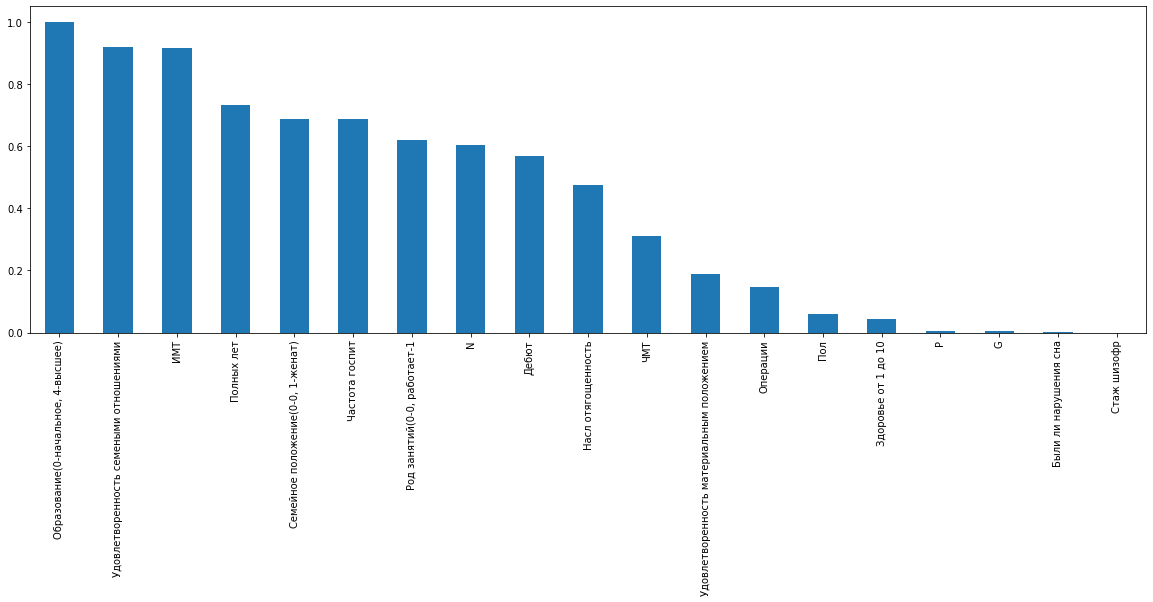

In [74]:
# The 2nd values are the PValue and we capture those below
univariate_scaled = pd.Series(univariate_scaled[1])
univariate_scaled.index = X.columns
univariate_scaled.sort_values(ascending=False).plot.bar(figsize=(20,6))

In [75]:
# Get TOP 5 features
sel_ = SelectKBest(f_classif, k=5).fit(X_scaled, y)
X.columns[sel_.get_support()]

Index(['Пол', 'Здоровье от 1 до 10', 'Были ли нарушения сна', 'P', 'G'], dtype='object')

In [76]:
# X_chi2_scaled # Были ли нарушения сна, Динамека веса за год, Аллергии, ГБ

In [77]:
# X_anova_scaled # Были ли нарушения сна, Аллергии, P, G

In [78]:
# How many times and which features were the most influential?

# Аллергии 4
# Были ли нарушения сна  3
# P 3
# G 3
# Динамека веса за год 1 
# ГБ 1
# Стаж шизофр 1

In [79]:
# Using best features
# X = X[['Аллергии', 'Были ли нарушения сна', 'P', 'G']]

# X = X[['Забол кожи', 'Были ли нарушения сна', 'Панкреатит', 'ГБ']]

# X = X[['Удовлетворенность материальным положением', 'Были ли нарушения сна', 'Забол кожи', 'P', 'G']]

# X = X[['Забол кожи', 'Были ли нарушения сна', 'Панкреатит', 'ГБ', 'P']]

# X = X[['P', 'G', 'ИМТ', 'Были ли нарушения сна', 'N']]

# X = X[['Были ли нарушения сна', 'Забол кожи', 'P']]

# X = X[['Были ли нарушения сна', 'Операции', 'P', 'G']]

In [80]:
# Get helper functions file
import os
if not os.path.exists("helper_functions.py"):
    print("Downloading helper functions...")
    !wget https://raw.githubusercontent.com/Nikitaion/TensorFlowLearning/main/extras/helper_functions.py
else:
    print("Helper functions file already exists, skipping download...")

--2022-07-11 12:39:34--  https://raw.githubusercontent.com/Nikitaion/TensorFlowLearning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-11 12:39:34 (63.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [81]:
# Create TensorBoard callback
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      montior="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True) # only save model weights (not whole model)
                                                      # verbose=1) # don't print out whether or not model is being saved


In [82]:
# Train/valid/test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15)


# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = minmax_scaler.fit_transform(X_train)
X_valid_scaled = minmax_scaler.transform(X_valid)
X_test_scaled = minmax_scaler.transform(X_test)

In [83]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=22,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/22
4/4 [==============================] - 2s 156ms/step - loss: 0.6974 - accuracy: 0.5840 - val_loss: 0.6731 - val_accuracy: 0.5926
Epoch 2/22
4/4 [==============================] - 0s 30ms/step - loss: 0.6696 - accuracy: 0.5600 - val_loss: 0.6574 - val_accuracy: 0.7037
Epoch 3/22
4/4 [==============================] - 0s 22ms/step - loss: 0.6506 - accuracy: 0.6000 - val_loss: 0.6423 - val_accuracy: 0.5926
Epoch 4/22
4/4 [==============================] - 0s 21ms/step - loss: 0.6490 - accuracy: 0.5840 - val_loss: 0.6268 - val_accuracy: 0.5926
Epoch 5/22
4/4 [==============================] - 0s 19ms/step - loss: 0.6267 - accuracy: 0.6560 - val_loss: 0.6241 - val_accuracy: 0.7407
Epoch 6/22
4/4 [==============================] - 0s 19ms/step - loss: 0.6035 - accuracy: 0.6880 - val_loss: 0.6145 - val_accuracy: 0.5926
Epoch 7/22
4/4 [==============================] - 0s 18ms/step - loss: 0.6196 - accuracy: 0.6240 - val_loss: 0.5936 - val_accuracy: 0.6296
Epoch 8/22
4/4 [==========

In [84]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 32ms/step - loss: 0.8838 - accuracy: 0.3913


[0.8838068246841431, 0.3913043439388275]

In [85]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=19,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/19
4/4 [==============================] - 2s 117ms/step - loss: 0.7136 - accuracy: 0.4960 - val_loss: 0.6839 - val_accuracy: 0.5926
Epoch 2/19
4/4 [==============================] - 0s 38ms/step - loss: 0.6699 - accuracy: 0.5840 - val_loss: 0.6601 - val_accuracy: 0.5926
Epoch 3/19
4/4 [==============================] - 0s 34ms/step - loss: 0.6388 - accuracy: 0.5760 - val_loss: 0.6451 - val_accuracy: 0.6296
Epoch 4/19
4/4 [==============================] - 0s 43ms/step - loss: 0.6126 - accuracy: 0.6640 - val_loss: 0.6113 - val_accuracy: 0.6667
Epoch 5/19
4/4 [==============================] - 0s 26ms/step - loss: 0.5883 - accuracy: 0.6800 - val_loss: 0.6492 - val_accuracy: 0.7778
Epoch 6/19
4/4 [==============================] - 0s 15ms/step - loss: 0.5863 - accuracy: 0.6560 - val_loss: 0.6071 - val_accuracy: 0.7037
Epoch 7/19
4/4 [==============================] - 0s 17ms/step - loss: 0.5865 - accuracy: 0.6720 - val_loss: 0.6441 - val_accuracy: 0.7037
Epoch 8/19
4/4 [==========

In [86]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 56ms/step - loss: 142.6864 - accuracy: 0.3913


[142.68637084960938, 0.3913043439388275]

In [87]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(21, activation='relu'),
    tf.keras.layers.Dense(21, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=22,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/22
4/4 [==============================] - 1s 93ms/step - loss: 0.7110 - accuracy: 0.5440 - val_loss: 0.6811 - val_accuracy: 0.5556
Epoch 2/22
4/4 [==============================] - 0s 13ms/step - loss: 0.6818 - accuracy: 0.5680 - val_loss: 0.6692 - val_accuracy: 0.5926
Epoch 3/22
4/4 [==============================] - 0s 16ms/step - loss: 0.6612 - accuracy: 0.5920 - val_loss: 0.6499 - val_accuracy: 0.5926
Epoch 4/22
4/4 [==============================] - 0s 18ms/step - loss: 0.6472 - accuracy: 0.6000 - val_loss: 0.6180 - val_accuracy: 0.7407
Epoch 5/22
4/4 [==============================] - 0s 16ms/step - loss: 0.6323 - accuracy: 0.6400 - val_loss: 0.5949 - val_accuracy: 0.7037
Epoch 6/22
4/4 [==============================] - 0s 21ms/step - loss: 0.6059 - accuracy: 0.6640 - val_loss: 0.5794 - val_accuracy: 0.7778
Epoch 7/22
4/4 [==============================] - 0s 23ms/step - loss: 0.6077 - accuracy: 0.7120 - val_loss: 0.5748 - val_accuracy: 0.7778
Epoch 8/22
4/4 [===========

In [88]:
model.evaluate(X_test, y_test)  # loss: 466.6897 - accuracy: 0.5217

1/1 [==============================] - 0s 31ms/step - loss: 21.6279 - accuracy: 0.5652


[21.62794303894043, 0.5652173757553101]

In [89]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid))#,
                    # callbacks=[model_checkpoint])

Epoch 1/100
4/4 [==============================] - 1s 115ms/step - loss: 0.6895 - accuracy: 0.5840 - val_loss: 0.6729 - val_accuracy: 0.5926
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6702 - accuracy: 0.5840 - val_loss: 0.6612 - val_accuracy: 0.5926
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6579 - accuracy: 0.5840 - val_loss: 0.6521 - val_accuracy: 0.5926
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6481 - accuracy: 0.5840 - val_loss: 0.6416 - val_accuracy: 0.5926
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6346 - accuracy: 0.5840 - val_loss: 0.6308 - val_accuracy: 0.5926
Epoch 6/100
4/4 [==============================] - 0s 23ms/step - loss: 0.6277 - accuracy: 0.6560 - val_loss: 0.6223 - val_accuracy: 0.7037
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6231 - accuracy: 0.6480 - val_loss: 0.6233 - val_accuracy: 0.5926
Epoch 8/100
4/4 [==

In [90]:
model.evaluate(X_test, y_test) # loss: 203.7137 - accuracy: 0.5217 047

1/1 [==============================] - 0s 35ms/step - loss: 67.5471 - accuracy: 0.4783


[67.54711151123047, 0.47826087474823]

In [91]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=150,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/150
4/4 [==============================] - 1s 53ms/step - loss: 0.7202 - accuracy: 0.4320 - val_loss: 0.7028 - val_accuracy: 0.5556
Epoch 2/150
4/4 [==============================] - 0s 11ms/step - loss: 0.6792 - accuracy: 0.5840 - val_loss: 0.6907 - val_accuracy: 0.5926
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6644 - accuracy: 0.5840 - val_loss: 0.6778 - val_accuracy: 0.5926
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 0.6550 - accuracy: 0.5840 - val_loss: 0.6689 - val_accuracy: 0.5926
Epoch 5/150
4/4 [==============================] - 0s 8ms/step - loss: 0.6451 - accuracy: 0.6000 - val_loss: 0.6575 - val_accuracy: 0.5926
Epoch 6/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6389 - accuracy: 0.6480 - val_loss: 0.6455 - val_accuracy: 0.6667
Epoch 7/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6374 - accuracy: 0.6400 - val_loss: 0.6564 - val_accuracy: 0.5926
Epoch 8/150
4/4 [=======

In [92]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 20ms/step - loss: 55.1471 - accuracy: 0.4348


[55.147132873535156, 0.43478259444236755]

In [93]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=150,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/150
4/4 [==============================] - 1s 51ms/step - loss: 0.7058 - accuracy: 0.4800 - val_loss: 0.6727 - val_accuracy: 0.5926
Epoch 2/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6758 - accuracy: 0.5840 - val_loss: 0.6617 - val_accuracy: 0.5926
Epoch 3/150
4/4 [==============================] - 0s 11ms/step - loss: 0.6600 - accuracy: 0.5920 - val_loss: 0.6483 - val_accuracy: 0.5926
Epoch 4/150
4/4 [==============================] - 0s 11ms/step - loss: 0.6476 - accuracy: 0.6160 - val_loss: 0.6319 - val_accuracy: 0.6296
Epoch 5/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6315 - accuracy: 0.6640 - val_loss: 0.6149 - val_accuracy: 0.7778
Epoch 6/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6172 - accuracy: 0.6880 - val_loss: 0.5933 - val_accuracy: 0.8148
Epoch 7/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6249 - accuracy: 0.6880 - val_loss: 0.6048 - val_accuracy: 0.6667
Epoch 8/150
4/4 [===

In [94]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 19ms/step - loss: 245.9003 - accuracy: 0.5652


[245.90028381347656, 0.5652173757553101]

In [95]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=350,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/350
4/4 [==============================] - 1s 50ms/step - loss: 0.6872 - accuracy: 0.5840 - val_loss: 0.6883 - val_accuracy: 0.5926
Epoch 2/350
4/4 [==============================] - 0s 9ms/step - loss: 0.6842 - accuracy: 0.5840 - val_loss: 0.6860 - val_accuracy: 0.5926
Epoch 3/350
4/4 [==============================] - 0s 9ms/step - loss: 0.6817 - accuracy: 0.5840 - val_loss: 0.6840 - val_accuracy: 0.5926
Epoch 4/350
4/4 [==============================] - 0s 9ms/step - loss: 0.6802 - accuracy: 0.5840 - val_loss: 0.6817 - val_accuracy: 0.5926
Epoch 5/350
4/4 [==============================] - 0s 9ms/step - loss: 0.6777 - accuracy: 0.5840 - val_loss: 0.6795 - val_accuracy: 0.5926
Epoch 6/350
4/4 [==============================] - 0s 9ms/step - loss: 0.6758 - accuracy: 0.5840 - val_loss: 0.6777 - val_accuracy: 0.5926
Epoch 7/350
4/4 [==============================] - 0s 10ms/step - loss: 0.6747 - accuracy: 0.5840 - val_loss: 0.6755 - val_accuracy: 0.5926
Epoch 8/350
4/4 [========

In [96]:
model.evaluate(X_test, y_test) # Same results with previous

1/1 [==============================] - 0s 18ms/step - loss: 1.3612 - accuracy: 0.6087


[1.3612337112426758, 0.6086956262588501]

In [97]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=150,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/150
4/4 [==============================] - 1s 53ms/step - loss: 0.7377 - accuracy: 0.4160 - val_loss: 0.7451 - val_accuracy: 0.3333
Epoch 2/150
4/4 [==============================] - 0s 17ms/step - loss: 0.7264 - accuracy: 0.4320 - val_loss: 0.7377 - val_accuracy: 0.3333
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 0.7171 - accuracy: 0.4240 - val_loss: 0.7307 - val_accuracy: 0.3333
Epoch 4/150
4/4 [==============================] - 0s 9ms/step - loss: 0.7102 - accuracy: 0.4400 - val_loss: 0.7246 - val_accuracy: 0.2963
Epoch 5/150
4/4 [==============================] - 0s 9ms/step - loss: 0.7021 - accuracy: 0.4560 - val_loss: 0.7195 - val_accuracy: 0.3704
Epoch 6/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6951 - accuracy: 0.4080 - val_loss: 0.7143 - val_accuracy: 0.3704
Epoch 7/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.4720 - val_loss: 0.7093 - val_accuracy: 0.4444
Epoch 8/150
4/4 [=======

In [98]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 25ms/step - loss: 53.0798 - accuracy: 0.4783


[53.07978057861328, 0.47826087474823]

In [99]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(21, activation='relu'),
    tf.keras.layers.Dense(21, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=150,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/150
4/4 [==============================] - 1s 145ms/step - loss: 0.6912 - accuracy: 0.5440 - val_loss: 0.6961 - val_accuracy: 0.5185
Epoch 2/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6814 - accuracy: 0.5600 - val_loss: 0.6903 - val_accuracy: 0.5926
Epoch 3/150
4/4 [==============================] - 0s 14ms/step - loss: 0.6741 - accuracy: 0.5760 - val_loss: 0.6854 - val_accuracy: 0.5926
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6699 - accuracy: 0.5760 - val_loss: 0.6810 - val_accuracy: 0.5926
Epoch 5/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6656 - accuracy: 0.5840 - val_loss: 0.6775 - val_accuracy: 0.5926
Epoch 6/150
4/4 [==============================] - 0s 11ms/step - loss: 0.6621 - accuracy: 0.5840 - val_loss: 0.6741 - val_accuracy: 0.5926
Epoch 7/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6590 - accuracy: 0.5920 - val_loss: 0.6712 - val_accuracy: 0.5926
Epoch 8/150
4/4 [====

In [100]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 22ms/step - loss: 71.3447 - accuracy: 0.4783


[71.34473419189453, 0.47826087474823]

In [101]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=150,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/150
4/4 [==============================] - 1s 61ms/step - loss: 0.6872 - accuracy: 0.5840 - val_loss: 0.6883 - val_accuracy: 0.5926
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6842 - accuracy: 0.5840 - val_loss: 0.6860 - val_accuracy: 0.5926
Epoch 3/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6817 - accuracy: 0.5840 - val_loss: 0.6840 - val_accuracy: 0.5926
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6802 - accuracy: 0.5840 - val_loss: 0.6817 - val_accuracy: 0.5926
Epoch 5/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6777 - accuracy: 0.5840 - val_loss: 0.6795 - val_accuracy: 0.5926
Epoch 6/150
4/4 [==============================] - 0s 11ms/step - loss: 0.6758 - accuracy: 0.5840 - val_loss: 0.6777 - val_accuracy: 0.5926
Epoch 7/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6747 - accuracy: 0.5840 - val_loss: 0.6755 - val_accuracy: 0.5926
Epoch 8/150
4/4 [====

In [102]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.9065 - accuracy: 0.5217


[0.9065135717391968, 0.52173912525177]

In [103]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=150,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/150
25/25 [==============================] - 1s 10ms/step - loss: 0.6857 - accuracy: 0.5920 - val_loss: 0.6827 - val_accuracy: 0.5926
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5840 - val_loss: 0.6772 - val_accuracy: 0.5926
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.5840 - val_loss: 0.6724 - val_accuracy: 0.5926
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.5840 - val_loss: 0.6679 - val_accuracy: 0.5926
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.5840 - val_loss: 0.6642 - val_accuracy: 0.5926
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.5840 - val_loss: 0.6618 - val_accuracy: 0.5926
Epoch 7/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.5840 - val_loss: 0.6560 - val_accuracy: 0.5926
Epoch 8/150


In [104]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 17ms/step - loss: 49.3463 - accuracy: 0.4783


[49.346343994140625, 0.47826087474823]

In [105]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=150,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/150
25/25 [==============================] - 1s 9ms/step - loss: 0.6872 - accuracy: 0.5840 - val_loss: 0.6822 - val_accuracy: 0.5926
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.5840 - val_loss: 0.6735 - val_accuracy: 0.5926
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.5840 - val_loss: 0.6701 - val_accuracy: 0.5926
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.5840 - val_loss: 0.6676 - val_accuracy: 0.5926
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.5840 - val_loss: 0.6638 - val_accuracy: 0.5926
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.5920 - val_loss: 0.6602 - val_accuracy: 0.5926
Epoch 7/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.5840 - val_loss: 0.6581 - val_accuracy: 0.5926
Epoch 8/150
2

In [106]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 18ms/step - loss: 262.5659 - accuracy: 0.3913


[262.56585693359375, 0.3913043439388275]

In [107]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=150,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/150
25/25 [==============================] - 1s 9ms/step - loss: 0.7239 - accuracy: 0.4400 - val_loss: 0.7236 - val_accuracy: 0.2963
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.4080 - val_loss: 0.7080 - val_accuracy: 0.4444
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5520 - val_loss: 0.6975 - val_accuracy: 0.5556
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.5600 - val_loss: 0.6926 - val_accuracy: 0.5926
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.5840 - val_loss: 0.6880 - val_accuracy: 0.5926
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.5840 - val_loss: 0.6844 - val_accuracy: 0.5926
Epoch 7/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.5840 - val_loss: 0.6828 - val_accuracy: 0.5926
Epoch 8/150
2

In [108]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 126.0458 - accuracy: 0.4783


[126.04578399658203, 0.47826087474823]

In [109]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),

    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=150,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/150
25/25 [==============================] - 1s 10ms/step - loss: 0.6792 - accuracy: 0.5840 - val_loss: 0.6724 - val_accuracy: 0.5926
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.5840 - val_loss: 0.6697 - val_accuracy: 0.5926
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.5840 - val_loss: 0.6671 - val_accuracy: 0.5926
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.5840 - val_loss: 0.6638 - val_accuracy: 0.5926
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.5840 - val_loss: 0.6599 - val_accuracy: 0.5926
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.5840 - val_loss: 0.6566 - val_accuracy: 0.5926
Epoch 7/150
25/25 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.5840 - val_loss: 0.6528 - val_accuracy: 0.5926
Epoch 8/150


In [110]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 19ms/step - loss: 293.3815 - accuracy: 0.3913


[293.3815002441406, 0.3913043439388275]

In [111]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),

    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=150,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[model_checkpoint])

Epoch 1/150
25/25 [==============================] - 1s 10ms/step - loss: 0.6838 - accuracy: 0.5520 - val_loss: 0.6660 - val_accuracy: 0.5926
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.5840 - val_loss: 0.6607 - val_accuracy: 0.5926
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.5840 - val_loss: 0.6503 - val_accuracy: 0.5926
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6496 - accuracy: 0.6160 - val_loss: 0.6380 - val_accuracy: 0.5926
Epoch 5/150
25/25 [==============================] - 0s 4ms/step - loss: 0.6365 - accuracy: 0.6720 - val_loss: 0.6348 - val_accuracy: 0.5926
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.6640 - val_loss: 0.6373 - val_accuracy: 0.6296
Epoch 7/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6189 - accuracy: 0.6560 - val_loss: 0.6174 - val_accuracy: 0.7037
Epoch 8/150


In [112]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 19ms/step - loss: 243.2173 - accuracy: 0.3913


[243.2173309326172, 0.3913043439388275]

In [113]:
y = data['Нарушения сна больше 5']
# X = data.drop(columns=['Нарушения сна больше 5'])
# X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование']]
X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
# X = data[[ 'P', 'N', 'G']] # Only with these 3 values we can get very good result

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

KeyError: ignored

In [ ]:
# Scale X from 0 to 1
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = minmax_scaler.fit_transform(X_train)
X_valid_scaled = minmax_scaler.transform(X_valid)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.003), # lr=0.003
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # Learning rate will increase at each epoch

history0 = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


In [ ]:
plot_loss_curves(history0)

### Find bels LR

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.003
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # Learning rate will increase at each epoch

history_lr = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

In [ ]:
import matplotlib.pyplot as plt

# Plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_lr.history["loss"]) # lrs - x-axis, history - y-axis
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history1 = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

In [ ]:
plot_loss_curves(history1)

In [ ]:
train_data = data[:121] # 70%
validation_data = data[121:155] # 20%
test_data = data[155:174] # 10%

In [ ]:
y_train = train_data['Нарушения сна больше 5']
y_validation = validation_data['Нарушения сна больше 5']
y_test = test_data['Нарушения сна больше 5']

X_train = train_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
X_validation = validation_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
X_test = test_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]

In [ ]:
len(y_train), len(y_validation), len(y_test)

In [ ]:
# y = data['Нарушения сна']
# # X = data.drop(columns=['Нарушения сна'])
# # X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование']]
# # X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
# X = data[[ 'P', 'N', 'G']] # Only with these 3 values we can get very good result

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [ ]:
# Scale X from 0 to 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.fit_transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.03
    metrics=["accuracy"]
)

history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_validation_scaled, y_validation))

In [ ]:
plot_loss_curves(history)

### It is very likely that the model has overfitted. It is necessary to add data augmentation, validation data, visualization
Find best lr

Вывести наиболее значимые характеристики



Check result on different scalers. For example:

1) Min Max Scaler (try it)

2) Standard Scaler

3) Max Abs Scaler

4) Robust Scaler

5) Quantile Transformer Scaler

6) Power Transformer Scaler

7) Unit Vector Scaler



In [ ]:
# Let's try to use 'Нарушения сна' as y value
data = ds.drop(columns=['Тревога больше 7', 'Madrs больше 6', 'Калгари больше 5'])
y = data['Нарушения сна больше 5']
# X = data.drop(columns=['Нарушения сна'])
X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']] # 'Были ли нарушения сна', 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Scale X from 0 to 1
scaler2 = StandardScaler()

X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.03
    metrics=["accuracy"]
)

history2 = model2.fit(X_train_scaled, y_train, epochs=50)